In [299]:
your_local_path = "E:/DataAnalyticsCourse/Machine_Learning/project/Datasets/Loan_prediction"

In [334]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]=(6,4)
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn import tree


In [381]:
train = pd.read_csv("E:/DataAnalyticsCourse/Machine_Learning/project/Datasets/Loan_prediction/train.csv")
test = pd.read_csv("E:/DataAnalyticsCourse/Machine_Learning/project/Datasets/Loan_prediction/test.csv")


train['source']= 'train'
test['source'] = 'test'
dataset = pd.concat([train,test],ignore_index= True)

dataset["LoanAmount"] =dataset.LoanAmount.fillna(dataset.LoanAmount.mean())
dataset["Loan_Amount_Term"] =dataset.Loan_Amount_Term.fillna(dataset.Loan_Amount_Term.mean())

dataset = dataset.apply(lambda x:x.fillna(x.value_counts().index[0]))


dataset["Gender"] = np.where(dataset.Gender =="male",1,0)
dataset["Married"] = np.where(dataset.Married =="Yes",1,0)
dataset["Dependents"] = np.where(dataset.Dependents =="0",0,(np.where(dataset.Dependents =="1",1,(np.where(dataset.Dependents =="2",2,3)))))

dataset["Education"] = np.where(dataset.Education =="Graduate",1,0)
dataset["Self_Employed"] = np.where(dataset.Self_Employed =="Yes",1,0)
dataset["Property_Area"] = np.where(dataset.Property_Area =="Urban",2,(np.where(dataset.Property_Area =="Semiurban",1,0)))
dataset["Loan_Status"] = np.where(dataset.Loan_Status =="Y",1,0)

#Feature Engneering
dataset["TotalIncome"]=dataset.ApplicantIncome+dataset.CoapplicantIncome
dataset["TotalIncome_log"]=np.log(dataset.TotalIncome)
dataset["LoanAmount_log"] =np.log(dataset.LoanAmount)



train = dataset.loc[dataset['source'] == "train"]
test =  dataset.loc[dataset['source'] == "test"]

#feature_cols =["Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area"]
#fearture_cols =["Gender","Married","Dependents","Education","Self_Employed","Credit_History","Property_Area"]
#fearture_cols = ["Education","TotalIncome_log","LoanAmount_Term","Credit_History"]
#feature_cols =["Self_Employed","TotalIncome_log","LoanAmount_log","Loan_Amount_Term","Credit_History","Property_Area"]

X = train[feature_cols]
y = train.Loan_Status

#from sklearn.model_selection import train_test_split
#X_Train,X_Test,Y_Train,Y_Test =  train_test_split(X,y,test_size=0.2,random_state=42)

# print (X_Train.shape, Y_Train.shape)
#print (X_Test.shape, Y_Test.shape)

# Data Exploration and Viduslization

In [369]:
#plt.hist(train.LoanAmount_log,bins=20)
#plt.show()
#plt.boxplot(train.LoanAmount_log)
#plt.show()
#a = pd.scatter_matrix(X,alpha=0.05,figsize=(10,10),diagonal='hist')



In [ ]:
train["TotalInncome"]=train.ApplicantIncome+train.CoapplicantIncome

# Logistic Regression

Model Score :  81.47
Acc_Score :  0.788617886179


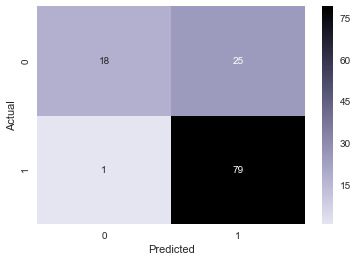

In [382]:
from sklearn.linear_model import LogisticRegression
logreg =LogisticRegression()
logreg.fit(X_Train,Y_Train)
Y_log_Pred = logreg.predict(X_Test).astype(int)
Model_log = round(logreg.score(X_Train,Y_Train)*100,2)
print("Model Score : " ,Model_log)
Acc_log = accuracy_score(Y_log_Pred,Y_Test)
print("Acc_Score : ", Acc_log)

#Confusion Metrix 

from sklearn import metrics
cnf_metrix = (metrics.confusion_matrix(Y_Test,Y_log_Pred))
cmap = sns.cubehelix_palette(50, hue=0.5, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cnf_metrix,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [388]:

## Submission

X_train = train[feature_cols]
Y_train =  train.Loan_Status
X_test = test[feature_cols]

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_log_pred = logreg.predict(X_test).astype(int)
acc_log = round(logreg.score(X_train,Y_train)*100,2)
acc_log

submission = pd.DataFrame({
        "Loan_ID": test["Loan_ID"],
        "Loan_Status": Y_log_pred
    })
submission["Loan_Status"] = np.where(submission.Loan_Status ==1,"Y","N")

submission.to_csv('E:/DataAnalyticsCourse/Machine_Learning/project/Datasets/Loan_prediction/submission.csv', index=False)
print(acc_log)

80.78


# Decision Tree

Model Score :  83.1
Acc_Score :  0.756097560976


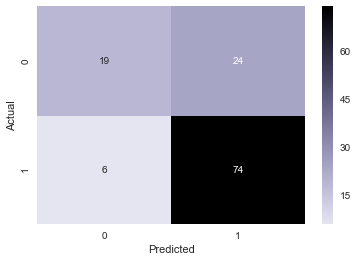

In [366]:
from sklearn import tree
my_one_tree = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3)

my_one_tree.fit(X_Train,Y_Train)
Y_tree_Pred = my_one_tree.predict(X_Test).astype(int)



Model_tree = round(my_one_tree.score(X_Train,Y_Train)*100,2)
print("Model Score : " ,Model_tree)
Acc_tree = accuracy_score(Y_tree_Pred,Y_Test,normalize=True)
print("Acc_Score : ", Acc_tree)

#Confusion Metrix 

from sklearn import metrics
cnf_metrix = (metrics.confusion_matrix(Y_Test,Y_tree_Pred))
cmap = sns.cubehelix_palette(50, hue=0.5, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cnf_metrix,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Random Forest

Model Score :  82.28
Acc_Score :  0.788617886179


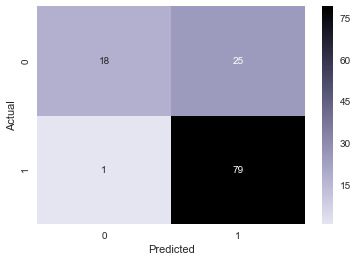

In [367]:
from sklearn import tree
forest = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)

forest.fit(X_Train,Y_Train)
Y_forest_Pred = forest.predict(X_Test).astype(int)

Model_forest = round(forest.score(X_Train,Y_Train)*100,2)
print("Model Score : " ,Model_forest)
Acc_forest = metrics.accuracy_score(Y_forest_Pred,Y_Test,normalize=True)
print("Acc_Score : ", Acc_forest)

#Confusion Metrix 

from sklearn import metrics
cnf_metrix = (metrics.confusion_matrix(Y_Test,Y_forest_Pred))
cmap = sns.cubehelix_palette(50, hue=0.5, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cnf_metrix,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# K-Fold

In [368]:
from sklearn.cross_validation import cross_val_score #importing cross validation package
# 5-fold cross-validation on logistic regression

scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy') #fitting logistic regression to whole data with 5 fold
print("Log:",scores)
print("Log:" ,scores.mean())


scores = cross_val_score(my_one_tree, X, y, cv=5, scoring='accuracy') #fitting logistic regression to whole data with 5 fold
print("tree:",scores)
print("tree:" ,scores.mean())



scores = cross_val_score(forest, X, y, cv=5, scoring='accuracy') #fitting logistic regression to whole data with 5 fold
print("forest:",scores)
print("forest:" ,scores.mean())

Log: [ 0.81451613  0.76612903  0.78688525  0.86065574  0.81967213]
Log: 0.809571655209
tree: [ 0.79032258  0.75        0.78688525  0.8442623   0.81967213]
tree: 0.798228450555
forest: [ 0.81451613  0.76612903  0.78688525  0.8442623   0.81967213]
forest: 0.806292966684
